In [1]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
sys.path.append('../') # Add parent directory to the system path

In [2]:
from direct_decomposition import direct_decomposition

In [3]:
HOM = 1/np.sqrt(2) * np.matrix([[1,1],[1,-1]])
interferom = direct_decomposition(HOM, 2)
print(interferom.depth())

197


In [4]:
print(interferom)

      ┌──────────────────────────┐          ┌────────────────────┐         »
q_0: ─┤ U3(2.2358,1.5928,1.5405) ├───■──────┤ U3(2.8072,-π,-π/2) ├──────■──»
     ┌┴──────────────────────────┴┐┌─┴─┐┌───┴────────────────────┴───┐┌─┴─┐»
q_1: ┤ U3(2.2672,2.9111,-0.25111) ├┤ X ├┤ U3(1.5713,0.65213,-1.5697) ├┤ X ├»
     ├────────────────────────────┤└───┘└────────────────────────────┘└───┘»
q_2: ┤ U3(0,0,-0.879130596475804) ├────────────────────────────────────────»
     └────────────────────────────┘                                        »
q_3: ──────────────────────────────────────────────────────────────────────»
                                                                           »
«     ┌────────────────────────────┐                                       »
«q_0: ┤ U3(1.0291,-1.9347,-3.0517) ├──■────────────────────────────────────»
«     ├───────────────────────────┬┘  │                                    »
«q_1: ┤ U3(1.957,-1.9279,-1.2125) ├───┼─────────────────────────────────■──»

In [4]:
# Initial state for HOM simulation
HOM_circuit = QuantumCircuit(4)
HOM_circuit.x(0)
HOM_circuit.x(2)
print(HOM_circuit)

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          


In [5]:
HOM_circuit.compose(interferom, qubits=list(range(4)), inplace=True)
HOM_circuit.measure_all()

{'1000': 499339, '0010': 500661}


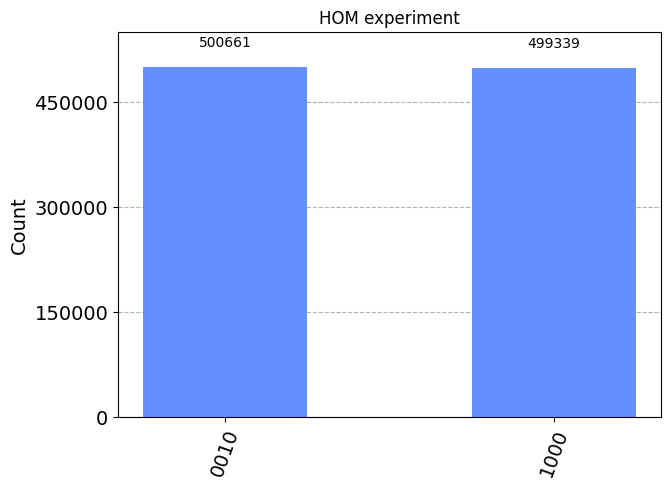

In [6]:
num_shots = 1e6
simulator = AerSimulator()
HOM_circuit = transpile(HOM_circuit, simulator)
result = simulator.run(HOM_circuit, shots=num_shots).result()
counts = result.get_counts(HOM_circuit)
print(counts)
plot_histogram(counts, title='HOM experiment')